In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from konlpy.tag import Okt

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

c:\Coding\Local\python_text_mining\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 
              'comp.sys.ibm.pc.hardware', 'sci.crypt']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
print(len(newsgroups_train.data), newsgroups_train.target_names)

3219 ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [3]:
cv = CountVectorizer(token_pattern=r"[\w']{2,}", stop_words='english', min_df=3, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)
print(review_cv.shape)

(3219, 16233)


In [4]:
np.set_printoptions(precision=3)

In [5]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10, topic_word_prior=0.1, doc_topic_prior=0.1,
                                learning_method='online', n_jobs=-1, random_state=0)

In [6]:
review_topics = lda.fit_transform(review_cv)
print(review_topics.shape)
print(review_topics[0])
gross_topic_weights = np.mean(review_topics, axis=0)
print(gross_topic_weights)
print(lda.components_.shape)

(3219, 10)
[4.927e-04 4.927e-04 4.927e-04 4.927e-04 4.927e-04 4.927e-04 6.506e-02
 4.927e-04 4.927e-04 9.310e-01]
[0.131 0.024 0.11  0.152 0.114 0.047 0.222 0.031 0.094 0.075]
(10, 16233)


In [7]:
def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: {', '.join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]])}")
    print()

In [8]:
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, ftp, file, information, available, data, mail, software, graphics, use
Topic #1: db, drive, ___, disk, __, drives, cs, hard, bh, si
Topic #2: space, nasa, launch, gov, moon, orbit, earth, article, shuttle, henry
Topic #3: key, encryption, clipper, chip, government, com, use, keys, security, public
Topic #4: university, nntp, host, posting, graphics, com, thanks, know, uk, ac
Topic #5: article, islam, islamic, com, don't, fred, people, bu, law, think
Topic #6: god, people, don't, just, com, know, think, jesus, say, like
Topic #7: com, article, bear, washington, right, points, tyre, den, cs, posting
Topic #8: scsi, com, ide, drive, bus, pc, controller, card, ibm, dos
Topic #9: com, morality, keith, sgi, article, caltech, sandvik, objective, moral, think



In [9]:
def show_perplexity(cv, start=5, end=20, max_iter=10, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()

    return start + per_value.index(min(per_value))

n_components: 5, perplexity: 4267.500
n_components: 6, perplexity: 4283.333
n_components: 7, perplexity: 4230.943
n_components: 8, perplexity: 4119.894
n_components: 9, perplexity: 4093.274
n_components: 10, perplexity: 4074.340
n_components: 11, perplexity: 4067.862
n_components: 12, perplexity: 4068.820
n_components: 13, perplexity: 4096.470
n_components: 14, perplexity: 4123.096
n_components: 15, perplexity: 4117.533
n_components: 16, perplexity: 4124.580
n_components: 17, perplexity: 4166.122
n_components: 18, perplexity: 4158.197
n_components: 19, perplexity: 4190.547
n_components: 20, perplexity: 4206.886


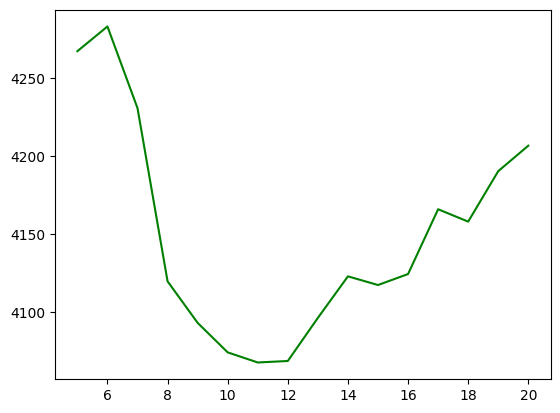

11

In [10]:
show_perplexity(review_cv)

In [11]:
lda = LatentDirichletAllocation(n_components=11, max_iter=10, topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='batch', n_jobs=-1, random_state=0)

In [12]:
review_topics = lda.fit_transform(review_cv)
print(review_topics.shape)
print(review_topics[0])
gross_topic_weights = np.mean(review_topics, axis=0)
print(gross_topic_weights)
print(lda.components_.shape)

(3219, 11)
[0.006 0.007 0.008 0.008 0.007 0.014 0.034 0.008 0.015 0.888 0.006]
[0.122 0.114 0.077 0.082 0.068 0.097 0.075 0.068 0.087 0.091 0.12 ]
(11, 16233)


In [13]:
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: graphics, image, file, ftp, available, data, files, mail, software, program
Topic #1: drive, card, university, com, disk, thanks, controller, host, nntp, bus
Topic #2: scsi, db, article, com, henry, toronto, ibm, cs, bit, ide
Topic #3: nasa, gov, article, com, just, like, people, space, don't, think
Topic #4: god, ___, atheism, posting, atheists, __, nntp, just, host, jesus
Topic #5: people, say, article, god, don't, think, jesus, christian, like, just
Topic #6: god, com, don't, does, brian, know, think, like, argument, just
Topic #7: com, key, posting, des, people, sgi, anonymous, don't, security, public
Topic #8: space, nasa, orbit, earth, launch, moon, lunar, shuttle, satellite, mission
Topic #9: com, article, keith, caltech, don't, nntp, sandvik, host, posting, morality
Topic #10: key, chip, clipper, encryption, government, com, access, use, keys, escrow



In [14]:
df = pd.read_csv("./data/petition_sampled.csv")
df.head()

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...


In [15]:
okt = Okt()

def tokenizer(doc):
    return [token for token, tag in okt.pos(doc) if len(token) > 1 and tag in ['Noun', 'Verb', 'Adjective']]

In [16]:
cv = CountVectorizer(tokenizer=tokenizer, max_features=5000, min_df=3, max_df=0.5)
pet_cv = cv.fit_transform(df['content'])
print(pet_cv.shape)

(18077, 5000)


In [17]:
lda = LatentDirichletAllocation(n_components=15, max_iter=10, topic_word_prior=0.1, doc_topic_prior=0.1, learning_method='batch', n_jobs=-1, random_state=0)
pet_topics = lda.fit_transform(pet_cv)

In [18]:
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: 국민, 보험, 국회의원, 국민연금, 하는, 세금, 난민, 외국인, 국회, 합니다
Topic #1: 화폐, 차량, 하는, 입니다, 합니다, 가상, 사고, 안전, 정부, 생각
Topic #2: 여성, 입니다, 공무원, 하는, 합니다, 남성, 의무, 남자, 군대, 행정
Topic #3: 사람, 병원, 입니다, 합니다, 가족, 환자, 치료, 하는, 판사, 사건
Topic #4: 하여, 민원, 하는, 내용, 하였습니다, 입니다, 있습니다, 하지, 대한, 확인
Topic #5: 아이, 경찰, 어린이집, 부패한, 입니다, 부모, 엄마, 범죄, 유치원, 위해
Topic #6: 입니다, 하는, 있는, 있습니다, 합니다, 하여, 지역, 문제, 이용, 불법
Topic #7: 합니다, 국민, 조사, 비리, 적폐, 청원, 수사, 이명박, 하여, 언론
Topic #8: 학생, 학교, 교육, 합니다, 입니다, 하는, 시험, 연금, 공무원, 교사
Topic #9: 경찰, 해서, 했다, 사건, 주차, 하는, 부정부패, 살인마, 있는, 범죄
Topic #10: 사람, 입니다, 주택, 아파트, 부동산, 서민, 합니다, 정책, 세금, 지금
Topic #11: 처벌, 피해자, 범죄, 가해자, 사건, 하는, 피해, 인권, 입니다, 사람
Topic #12: 국민, 대통령, 북한, 정부, 우리, 하는, 나라, 대한민국, 문재인, 입니다
Topic #13: 합니다, 생각, 하는, 사람, 입니다, 청원, 있습니다, 청소년, 있는, 국민
Topic #14: 하는, 회사, 입니다, 기업, 합니다, 근로자, 일자리, 근무, 업체, 있습니다



In [19]:
okt = Okt()

def tokenizer(doc):
    return [token for token, tag in okt.pos(doc) if len(token) > 1 and tag in ['Noun']]

In [20]:
cv = CountVectorizer(tokenizer=tokenizer, max_features=3000, min_df=3, max_df=0.5)
pet_cv = cv.fit_transform(df['content'])
print(pet_cv.shape)

(18077, 3000)


In [21]:
lda = LatentDirichletAllocation(n_components=15, max_iter=10, topic_word_prior=0.1, doc_topic_prior=0.1, learning_method='batch', n_jobs=-1, random_state=0)
pet_topics = lda.fit_transform(pet_cv)

In [22]:
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: 병원, 치료, 환자, 의사, 안전, 의료, 사고, 수술, 국가, 발생
Topic #1: 국민, 청원, 대한민국, 국가, 나라, 사람, 생각, 난민, 의무, 우리
Topic #2: 대통령, 북한, 국민, 우리, 문재인, 정부, 한국, 대한민국, 나라, 생각
Topic #3: 국민, 세금, 연금, 공무원, 국민연금, 소득, 사람, 지금, 일자리, 보험
Topic #4: 근무, 회사, 근로자, 직원, 시간, 생각, 임금, 업무, 사람, 고용
Topic #5: 선수, 게임, 협회, 올림픽, 감독, 축구, 경기, 생각, 스포츠, 연맹
Topic #6: 사용, 민원, 주민, 보험, 문제, 공사, 사람, 경우, 내용, 업체
Topic #7: 주택, 부동산, 아파트, 정부, 공무원, 정책, 국회의원, 분양, 행정, 서울
Topic #8: 정부, 기업, 화폐, 투자, 경제, 가상, 시장, 거래, 정책, 생각
Topic #9: 경찰, 민원, 조직, 국민, 불법, 범죄, 위해, 대한민국, 공원, 사리
Topic #10: 아이, 교사, 생각, 학교, 사람, 우리, 부모, 어린이집, 엄마, 저희
Topic #11: 사람, 여성, 생각, 남성, 남자, 사회, 여자, 처벌, 차량, 문제
Topic #12: 학생, 교육, 시험, 학교, 생각, 대학, 공부, 제도, 문제, 평가
Topic #13: 경찰, 청소년, 사건, 처벌, 보호, 범죄, 폭행, 살인, 피해자, 가해자
Topic #14: 사건, 피해자, 조사, 처벌, 수사, 사실, 사람, 대한, 피해, 판결



In [23]:
trend_data = pd.DataFrame(pet_topics, columns=[f"Topic{str(i)}" for i in range(1, 16)])
trend_data = pd.concat([trend_data, df['start'].map(lambda x: x[:7])], axis=1)
trend_data.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,start
0,0.000354,0.000354,0.000354,0.000354,0.024806,0.135561,0.403072,0.177820,0.000354,0.074001,0.000354,0.000354,0.000354,0.000354,0.181553,2017-08
1,0.000930,0.000930,0.000931,0.245473,0.000931,0.000930,0.364288,0.000930,0.000930,0.000930,0.379073,0.000931,0.000930,0.000930,0.000930,2017-08
2,0.001710,0.001710,0.001710,0.001710,0.001710,0.001710,0.001710,0.001710,0.001710,0.001710,0.001710,0.001710,0.976063,0.001710,0.001710,2017-08
3,0.026520,0.208259,0.255387,0.000255,0.064148,0.000255,0.000255,0.000255,0.417948,0.000255,0.000256,0.000256,0.025439,0.000255,0.000256,2017-08
4,0.000512,0.626813,0.131654,0.044874,0.000512,0.000512,0.078906,0.000512,0.000512,0.000512,0.000512,0.094567,0.000512,0.018580,0.000512,2017-08


In [24]:
trend = trend_data.groupby(['start']).mean()
trend.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,,,,,,,,,,,
2017-08,0.069568,0.044469,0.097176,0.047381,0.130232,0.014295,0.118325,0.052245,0.032322,0.013275,0.189231,0.033189,0.087496,0.023812,0.046984
2017-09,0.037164,0.065037,0.057755,0.032005,0.045537,0.020378,0.049442,0.028088,0.023727,0.016849,0.123424,0.075635,0.048300,0.335793,0.040866
2017-10,0.053444,0.066134,0.087143,0.044374,0.080665,0.028499,0.120272,0.050793,0.040053,0.045884,0.108240,0.100882,0.066283,0.040670,0.066663
2017-11,0.051688,0.075451,0.122670,0.037670,0.039213,0.058564,0.061903,0.034276,0.028987,0.046448,0.058032,0.062908,0.163422,0.035950,0.122816
2017-12,0.066669,0.087285,0.090221,0.065243,0.087276,0.025636,0.094514,0.056482,0.058318,0.020903,0.084927,0.074997,0.066749,0.042549,0.078232


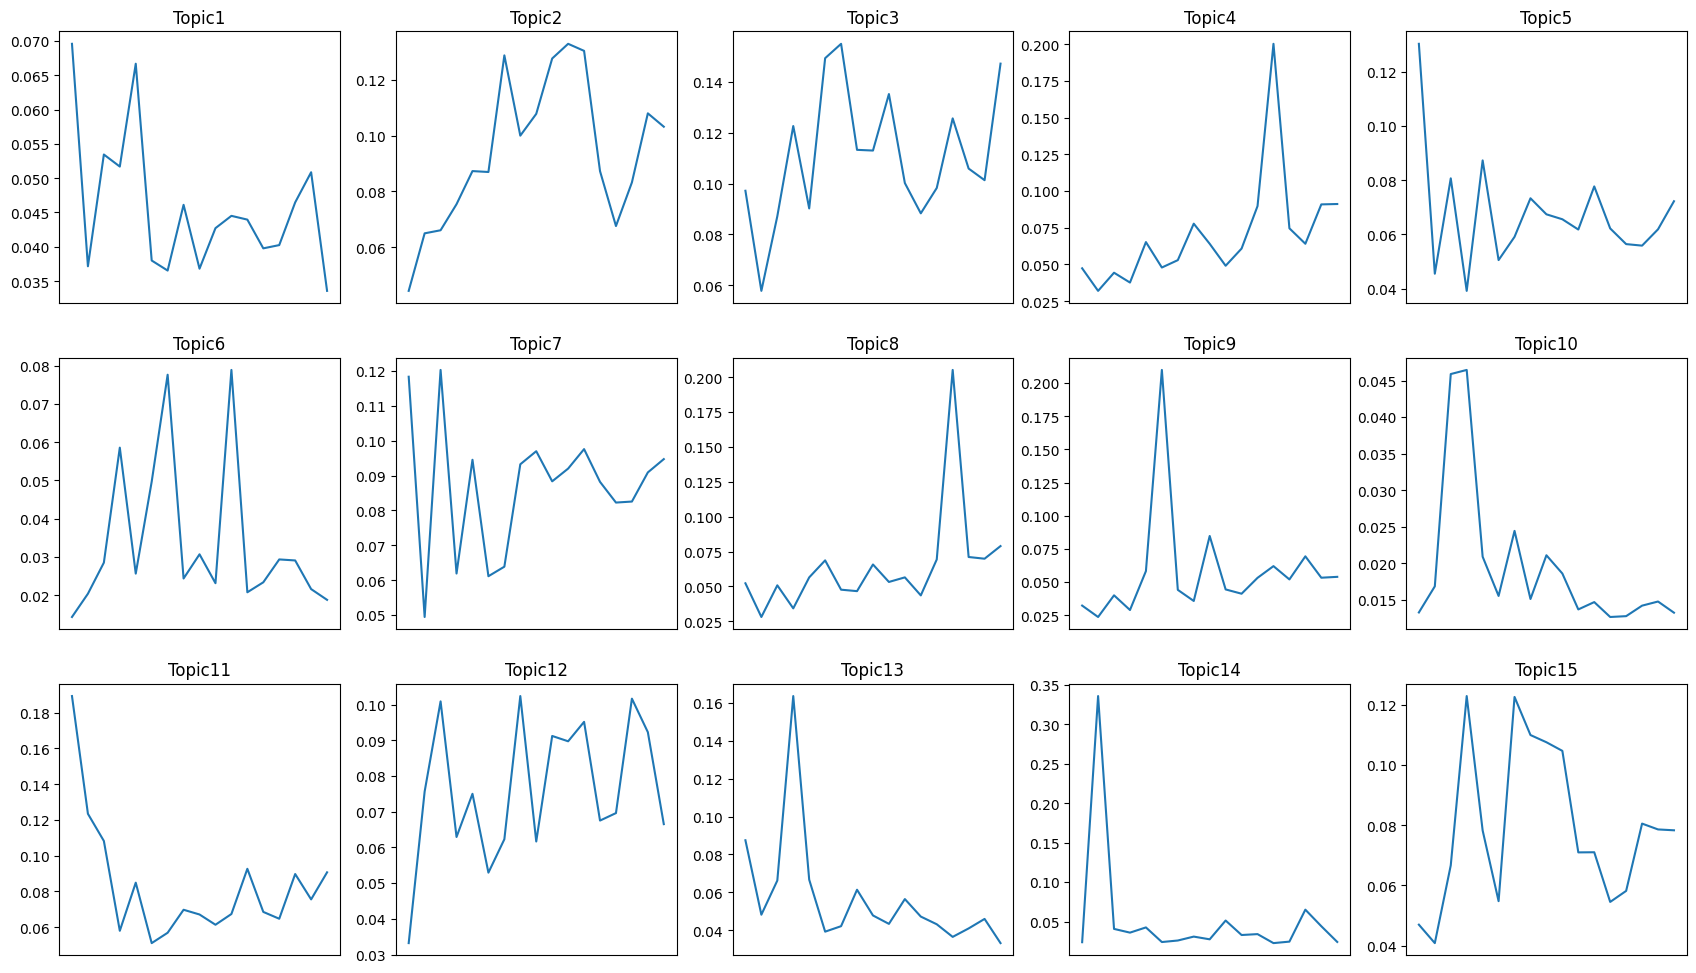

In [25]:
fig, axs = plt.subplots(3, 5, sharex='col', figsize=(21, 12))
for col, ax in zip(trend.columns.tolist(), axs.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()

In [26]:
# 책에 나온 gensim의 dynamic topic modeling 대신 bertopic의 dynamic topic modeling 활용

In [27]:
df = df.assign(date=df['start'].map(lambda ser: ser[:7]))
df.head()

,article_id,start,end,answered,votes,category,title,content,date
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...,2017-08
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...,2017-08
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...,2017-08
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...,2017-08
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...,2017-08


In [28]:
docs, timestamps = df['content'].tolist(), df['date'].tolist()
embedding_model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS', device='cuda')

In [29]:
topic_model = BERTopic(embedding_model=embedding_model, min_topic_size=100, language='multilingual', verbose=True)
topics, probs = topic_model.fit_transform(docs)

2025-10-02 20:12:44,536 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 565/565 [00:26<00:00, 21.56it/s]
2025-10-02 20:13:11,037 - BERTopic - Embedding - Completed ✓
2025-10-02 20:13:11,038 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-10-02 20:13:25,611 - BERTopic - Dimensionality - Completed ✓
2025-10-02 20:13:25,613 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-10-02 20:13:28,164 - BERTopic - Cluster - Completed ✓
2025-10-02 20:13:28,167 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-10-02 20:13:30,692 - BERTopic - Representation - Completed ✓


In [30]:
print(topic_model.get_topic(0))
display(topic_model.get_topic_info())

[('있습니다', np.float64(0.01214080871004412)), ('있는', np.float64(0.010203924287294924)), ('합니다', np.float64(0.009690331996287573)), ('하고', np.float64(0.0082464035897568)), ('일을', np.float64(0.007715803733399959)), ('하는', np.float64(0.007440661994779792)), ('저는', np.float64(0.006521764838706478)), ('최저임금', np.float64(0.0063242831657683825)), ('일자리', np.float64(0.006155698790528238)), ('너무', np.float64(0.0059196348648171615))]


,Topic,Count,Name,Representation,Representative_Docs
0,-1,6583,-1_있습니다_있는_합니다_하고,"[있습니다, 있는, 합니다, 하고, 대한, 하는, 위해, 없는, 많은, 저는]",[(내용추가)헌법개정 반대합니다.! 일반행정공무원과 운전공무원을 폐지해야 이 나라가...
1,0,1306,0_있습니다_있는_합니다_하고,"[있습니다, 있는, 합니다, 하고, 일을, 하는, 저는, 최저임금, 일자리, 너무]",[Ⅰ. 오늘도 나는 오전 9시에 사무실에 출근하여 여유있게 믹스커피 한 잔을 마시고...
2,1,1096,1_부동산_아파트_있는_있습니다,"[부동산, 아파트, 있는, 있습니다, 합니다, 집을, 서울, 주택, 없는, 하는]",[부자들은\n토지와 주택등 부동산만 사 놓으면\n임대료등 돈이 생기고 부동산폭등으로...
3,2,665,2_있습니다_합니다_있는_하는,"[있습니다, 합니다, 있는, 하는, 자동차, 차량, 차를, 생각합니다, 너무, 화재]",[1. 포항 죽도파출소에서 야간 근무중 새벽 3시경 사망한 30세 신입 故 최준영 ...
4,3,620,3_가상화폐_공매도_거래소_있습니다,"[가상화폐, 공매도, 거래소, 있습니다, 있는, 하고, 합니다, 가상화폐에, 하는,...","[가상화폐 과열양상을 가라앉히고 발전시키는데, 거래자 규제 강화도 좋지만\n가상화폐..."
5,4,557,4_올림픽_선수_선수들이_대한민국,"[올림픽, 선수, 선수들이, 대한민국, 선수가, 국가대표, 출전, 합니다, 단일팀,...",[안녕하세요. 저는 이번 평창 동계올림픽을 기대하는 국민 중 하나입니다.\n대한민국...
6,5,547,5_아이를_어린이집_있는_있습니다,"[아이를, 어린이집, 있는, 있습니다, 합니다, 유치원, 아이들이, 하는, 너무, 아이]",[안녕하세요 두아이를 두고 있는 엄마입니다.\n큰아이가 내년이 되면 6세가 되어 ...
7,6,519,6_있습니다_여성_무고_성범죄,"[있습니다, 여성, 무고, 성범죄, 하는, 있는, 여성의, 대한, 여성이, 합니다]",[한 사람을 성추행범으로 몰려고 한 사람을 매장시키려 했던 거짓 미투 발언한 여성 ...
8,7,479,7_청원_청원이_있습니다_있는,"[청원, 청원이, 있습니다, 있는, 청원을, 댓글, 청와대, 하는, 대한, 합니다]",[언제부턴가 뉴스 기사는 지면이 아닌 스마트폰으로 더 많이 접하게 되었습니다.\n그...
9,8,461,8_북한_북한의_북한이_있다,"[북한, 북한의, 북한이, 있다, 것이다, 한반도, 미국이, 남북, 있는, 북한은]",[* 추미애 더불어민주당 대표가 북한의 6차 핵실험 등 한반도 안보위기 국면과 관련...


In [31]:
topics_over_time = topic_model.topics_over_time(docs, timestamps)
topic_model.visualize_topics_over_time(topics_over_time)

17it [00:31,  1.82s/it]


In [32]:
topic_model.visualize_topics()

In [34]:
topic_model.visualize_barchart()